In [ ]:
# 다중선형회귀 연습문제
# 관측된 Solar.R, Wind, Temp에 대한 Ozone량에 대한 데이터를 이용하여 machine learning을 진행하고
# Solar.R이 170, Wind가 7.4, Temp가 67.0일 때 Ozone 수치를 예측하자.

In [ ]:
# Q) solar.R 이랑 ozone이랑 선형 아니지 않나????????????????????????????????????????

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [65]:
# 1. raw data load
df = pd.read_csv("C:/Users/student/Desktop/data/ozone.csv")
display(df)
df.shape
df.isnull().sum()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5
...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26
149,NaN,145.0,13.2,77,9,27
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29


Ozone      37
Solar.R     7
Wind        0
Temp        0
Month       0
Day         0
dtype: int64

In [66]:
# 2. 전처리

# 2-1. 필요한 column 추출
df = df[["Ozone", "Solar.R", "Wind", "Temp"]]

# 2-2. 결측치 처리
df = df.dropna(how = "any", inplace = False)
display(df)
df.isnull().sum()

# 2-3. 이상치 확인
# plt.boxplot(df["Temp"])         # Temp: 없음.
# plt.boxplot(df["Wind"])         # 상위 이상치 3개
# plt.boxplot(df["Solar.R"])      # Solar.R : 없음.
# plt.boxplot(df["Ozone"])        # 상위 이상치 2개

# 2-4. 이상치 제거
# 1) Wind 에 대해 이상치 제거
wind1, wind3 = np.percentile(df["Wind"], [25, 75])
print(wind1, wind3)
iqrWind = wind3 - wind1
print(iqrWind)
upperWind = wind3 + iqrWind * 1.5
print(upperWind) # 17.65

# 2) Ozone 에 대해 이상치 제거
ozone1, ozone3 = np.percentile(df["Ozone"], [25, 75])
print(ozone1, ozone3)
iqrOzone = ozone3 - ozone1
print(iqrOzone)
upperOzone = ozone3 + iqrOzone * 1.5
print(upperOzone) # 128.0

# 3) mask, boolean indexing
# mask에 조건 2개 넣을 때
# 참고사이트 : https://stackoverflow.com/questions/42380385/multiple-criteria-for-boolean-indexing

mask = (df["Ozone"] > upperOzone) | (df["Wind"] > upperWind)
df = df.loc[~mask]
display(df)

# plt.boxplot(df["Ozone"]) # 없음.
# plt.boxplot(df["Solar.R"]) # 없음.
# plt.boxplot(df["Wind"]) # 없음.
# plt.boxplot(df["Temp"]) # 없음.

,Ozone,Solar.R,Wind,Temp
0,41.0,190.0,7.4,67
1,36.0,118.0,8.0,72
2,12.0,149.0,12.6,74
3,18.0,313.0,11.5,62
6,23.0,299.0,8.6,65
...,...,...,...,...
147,14.0,20.0,16.6,63
148,30.0,193.0,6.9,70
150,14.0,191.0,14.3,75
151,18.0,131.0,8.0,76


7.4 11.5
4.1
17.65
18.0 62.0
44.0
128.0


,Ozone,Solar.R,Wind,Temp
0,41.0,190.0,7.4,67
1,36.0,118.0,8.0,72
2,12.0,149.0,12.6,74
3,18.0,313.0,11.5,62
6,23.0,299.0,8.6,65
...,...,...,...,...
147,14.0,20.0,16.6,63
148,30.0,193.0,6.9,70
150,14.0,191.0,14.3,75
151,18.0,131.0,8.0,76


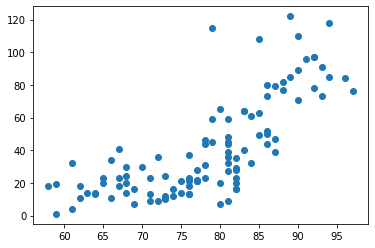

In [58]:
plt.scatter(df["Temp"], df["Ozone"])

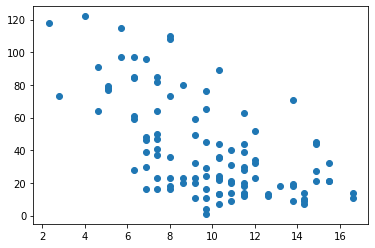

In [59]:
plt.scatter(df["Wind"], df["Ozone"])

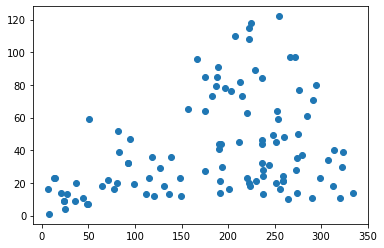

In [60]:
plt.scatter(df["Solar.R"], df["Ozone"])

In [67]:
# 정규화: 데이터 scale 변환

df["Temp_Norm"] = (df["Temp"]-df["Temp"].min())/(df["Temp"].max()-df["Temp"].min())
df["Wind_Norm"] = (df["Wind"]-df["Wind"].min())/(df["Wind"].max()-df["Wind"].min())
df["Solar.R_Norm"] = (df["Solar.R"]-df["Solar.R"].min())/(df["Solar.R"].max()-df["Solar.R"].min())
df["Ozone_Norm"] = (df["Ozone"]-df["Ozone"].min())/(df["Ozone"].max()-df["Ozone"].min())
display(df)

,Ozone,Solar.R,Wind,Temp,Temp_Norm,Wind_Norm,Solar.R_Norm,Ozone_Norm
0,41.0,190.0,7.4,67,0.230769,0.356643,0.559633,0.330579
1,36.0,118.0,8.0,72,0.358974,0.398601,0.339450,0.289256
2,12.0,149.0,12.6,74,0.410256,0.720280,0.434251,0.090909
3,18.0,313.0,11.5,62,0.102564,0.643357,0.935780,0.140496
6,23.0,299.0,8.6,65,0.179487,0.440559,0.892966,0.181818
...,...,...,...,...,...,...,...,...
147,14.0,20.0,16.6,63,0.128205,1.000000,0.039755,0.107438
148,30.0,193.0,6.9,70,0.307692,0.321678,0.568807,0.239669
150,14.0,191.0,14.3,75,0.435897,0.839161,0.562691,0.107438
151,18.0,131.0,8.0,76,0.461538,0.398601,0.379205,0.140496


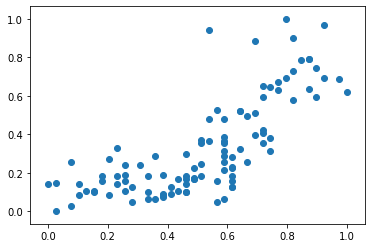

In [116]:
plt.scatter(df["Temp_Norm"], df["Ozone_Norm"])

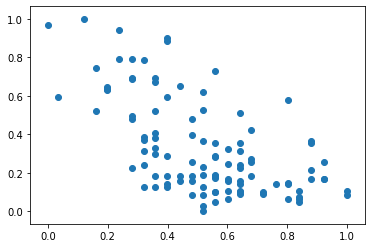

In [117]:
plt.scatter(df["Wind_Norm"], df["Ozone_Norm"])

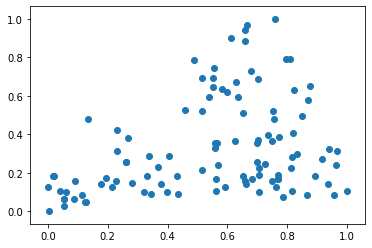

In [118]:
plt.scatter(df["Solar.R_Norm"], df["Ozone_Norm"])

In [124]:
# 머신러닝
# 3-1. Training data set
# values로 땡겨 오면 array로 형성된다.
# 구글링 참고 : https://stackoverflow.com/questions/13187778/convert-pandas-dataframe-to-numpy-array

x_data = df[["Temp_Norm", "Wind_Norm", "Solar.R_Norm"]].values   # numpy.ndarray -> shape :106, 3
y_data = df[["Ozone_Norm"]].values # numpy.ndarray -> shape : 106, 1
# y_data = df["Ozone"].values.reshape(-1,1) -> 이렇게 해줘도 됨. : 행의 개수 정하지 않음.
# 참고페이지: https://stackoverflow.com/questions/18691084/what-does-1-mean-in-numpy-reshape


# 3-2. placeholder
X = tf.placeholder(shape=[None, 3], dtype=tf.float32)
Y = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# 3-3. weight, bias 지정
W = tf.Variable(tf.random_normal([3,1]), name = "weight")
b = tf.Variable(tf.random_normal([1]), name = "bias")

# 3-4. hypothesis
H = tf.matmul(X, W) + b

# 3-5. cost
cost = tf.reduce_mean(tf.square(H-Y))

# 3-6. train
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.1)
train = optimizer.minimize(cost)

# 3-7. session, 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 3-8. 학습
for step in range(30000):
    _, cost_val = sess.run([train, cost],
                          feed_dict = {X : x_data,
                                      Y : y_data})
    if step % 3000 == 0:
        print("cost값 : {}".format(cost_val))
        
# 3-9. 예측
normTmp = (67.0 - df["Temp"].min())/(df["Temp"].max()-df["Temp"].min())
normWind = (7.4 - df["Wind"].min())/(df["Wind"].max()-df["Wind"].min())
normSolar = (170 - df["Solar.R"].min())/(df["Solar.R"].max()-df["Solar.R"].min())

normData = [[normTmp, normWind, normSolar]]
print(normData)

result_scale = sess.run(H, feed_dict = { X : normData})
print(result_scale)

result_ozone = result_scale * (df["Ozone"].max()-df["Ozone"].min()) + df["Ozone"].min()
print(result_ozone)

cost값 : 2.922238826751709
cost값 : 0.02000429853796959
cost값 : 0.02000429853796959
cost값 : 0.02000429853796959
cost값 : 0.02000429853796959
cost값 : 0.02000429853796959
cost값 : 0.02000429853796959
cost값 : 0.02000429853796959
cost값 : 0.02000429853796959
cost값 : 0.02000429853796959
[[0.23076923076923078, 0.35664335664335667, 0.4984709480122324]]
[[0.22294375]]
[[27.976194]]
